## Linear Regression
 - https://scikit-learn.org/stable/modules/linear_model.html
  - the target value is expected to be a linear combination of the input variables
  - if $\hat{y}$ is the predicted value, $\hat{y}$(${w,x}$) = $w_{0}$ + $w_{1}$$x_{1}$ + $w_{2}$$x_{2}$ + ... + $w_{p}$$x_{p}$
  - the vector $w = (w_{1}, w_{2}, ... w_{p})$ is denoted by coef_ and $w_{0}$ as intercept_
  - fits a linear model with coefficients  to minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation

<img src="http://people.bu.edu/kalathur/figs/lr.jpg" width="500"/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(precision=4, suppress=True)

In [2]:
from sklearn import datasets

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score, scorer

from sklearn.model_selection import train_test_split, cross_val_score


### Example: $y = w_{0}$ + $w_{1}$$x_{1}$ + $w_{2}$$x_{2}$

In [3]:
reg = LinearRegression()

In [4]:
X = [[0, 0], [1, 1], [2, 2], [3, 3]]
y = [0, 1, 2, 3]

In [5]:
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
reg.coef_

array([0.5, 0.5])

In [7]:
reg.intercept_

4.440892098500626e-16

In [8]:
np.allclose(reg.intercept_, 0)

True

In [9]:
reg.predict([[1, 2], [2, 3]])

array([1.5, 2.5])

In [10]:
reg.predict(X)

array([0., 1., 2., 3.])

In [11]:
reg.score(X, y)

1.0

## Example - Pizza Price Predictor

<img src="http://people.bu.edu/kalathur/figs/lr_2.jpg" width="500"/>

In [12]:
# X represents the features of our training data, the diameters of the pizzas.

x = np.array([6, 8, 10, 14, 18])
x

array([ 6,  8, 10, 14, 18])

In [13]:
# reshape as a matrix

X = x[:, np.newaxis]
X

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]])

In [14]:
# y is a vector representing the prices of the pizzas.

y = [7, 9, 13, 17.5, 18]
y

[7, 9, 13, 17.5, 18]

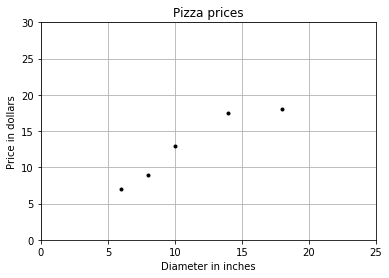

In [15]:
plt.figure()
plt.title('Pizza prices')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'k.')
plt.axis([0, 25, 0, 30])
plt.grid(True)
plt.show()

In [16]:
# Create an instance of the estimator, LinearRegression
model = LinearRegression()

# Fit the model on the training data
model.fit(X, y)

# Predict the price of a pizza with a diameter that has never been seen before
test_pizza = np.array([[12]])
predicted_price = model.predict(test_pizza)[0]

print('A 12" pizza should cost: ${:.2f}'.format(predicted_price))

test_pizza = np.array([[25]])
predicted_price = model.predict(test_pizza)[0]
print('A 25" pizza should cost: ${:.2f}'.format(predicted_price))

A 12" pizza should cost: $13.68
A 25" pizza should cost: $26.37


In [17]:
model.coef_, model.intercept_

(array([0.9763]), 1.965517241379315)

In [18]:
25 * model.coef_ + model.intercept_

array([26.3728])

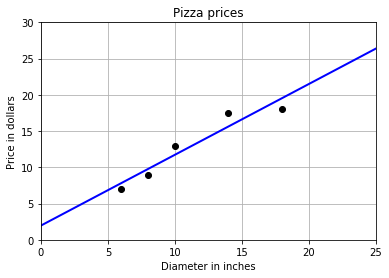

In [19]:
plt.figure()
plt.title('Pizza prices')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'ko')
plt.axis([0, 25, 0, 30])
plt.grid(True)
plt.plot([0, 25], [model.intercept_, predicted_price], 
         color='b', linestyle='-', linewidth=2)
plt.show()

In [20]:
print('Residual sum of squares: {:.2f}'.format(
    np.mean((model.predict(X) - y) ** 2)))

Residual sum of squares: 1.75


#### Evaluating the model using test data
<img src="http://people.bu.edu/kalathur/figs/lr_3.jpg" width="500"/>

In [21]:
# Training and test data

X = [[6], [8], [10], [14],   [18]]
y = [7, 9, 13, 17.5, 18]

X_test = [[8],  [9],   [11], [16], [12]]
y_test = [11, 8.5, 15, 18, 11]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X_test)


print("Mean squared error: {:.4f}".format(
        mean_squared_error(y_test, y_pred)))

print("Variance score: {:.4f}".format(
    r2_score(y_test, y_pred)))

print("R-squared score: {:.4f}".format( # closer to 1 the more correlated the data is
    model.score(X_test, y_test)))

Mean squared error: 3.8396
Variance score: 0.6620
R-squared score: 0.6620


In [22]:
list(zip(y_test, y_pred))

[(11, 9.77586206896552),
 (8.5, 10.752155172413794),
 (15, 12.704741379310345),
 (18, 17.586206896551722),
 (11, 13.681034482758621)]

In [23]:
sum_of_sqaures_residuals = np.sum((y_test - y_pred)**2)
sum_of_sqaures_residuals

19.1980993608799

In [24]:
sum_of_squares_total = np.sum((y_test - np.mean(y_test))**2)
sum_of_squares_total

56.8

In [25]:
r2 = 1 - (sum_of_sqaures_residuals/sum_of_squares_total)
r2

0.6620052929422553

### Diabetes dataset

In [26]:
diabetes = datasets.load_diabetes()

In [27]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [28]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [29]:
diabetes.target[:5]

array([151.,  75., 141., 206., 135.])

In [30]:
diabetes.data[:5]

array([[ 0.0381,  0.0507,  0.0617,  0.0219, -0.0442, -0.0348, -0.0434,
        -0.0026,  0.0199, -0.0176],
       [-0.0019, -0.0446, -0.0515, -0.0263, -0.0084, -0.0192,  0.0744,
        -0.0395, -0.0683, -0.0922],
       [ 0.0853,  0.0507,  0.0445, -0.0057, -0.0456, -0.0342, -0.0324,
        -0.0026,  0.0029, -0.0259],
       [-0.0891, -0.0446, -0.0116, -0.0367,  0.0122,  0.025 , -0.036 ,
         0.0343,  0.0227, -0.0094],
       [ 0.0054, -0.0446, -0.0364,  0.0219,  0.0039,  0.0156,  0.0081,
        -0.0026, -0.032 , -0.0466]])

In [31]:
# Use only the bmi feature

# diabetes_X = diabetes.data[:, np.newaxis, 2]

diabetes_X = diabetes.data[:,  [2]] # select 'bmi' column

diabetes_X[:5]

array([[ 0.0617],
       [-0.0515],
       [ 0.0445],
       [-0.0116],
       [-0.0364]])

In [32]:
# Split the data into training/testing sets

diabetes_X_train = diabetes_X[:-20]
diabetes_X_test  = diabetes_X[-20:]

In [33]:
# Split the targets into training/testing sets

diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [34]:
# Create linear regression object

lr = LinearRegression()

In [35]:
# Train the model using the training sets

lr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
# Make predictions using the testing set

diabetes_y_pred = lr.predict(diabetes_X_test)

In [37]:
# The coefficients

print('Coefficients: \n', lr.coef_)

Coefficients: 
 [938.2379]


In [38]:
# The intercept

print('Intercept: \n', lr.intercept_)

Intercept: 
 152.91886182616167


In [39]:
# The mean squared error

print("Mean squared error: {:.2f}".format(
        mean_squared_error(diabetes_y_test, diabetes_y_pred)))

Mean squared error: 2548.07


In [40]:
# Explained variance score: 1 is perfect prediction

print("Variance score: {:.2f}".format(
    r2_score(diabetes_y_test, diabetes_y_pred)))

Variance score: 0.47


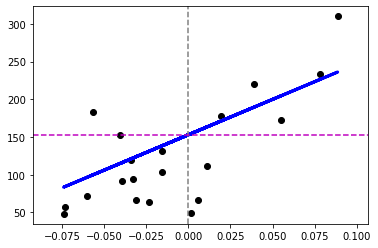

In [41]:
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')

plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.axvline(0, c='gray', ls='--')
plt.axhline(lr.intercept_, c='m', ls='--');


## Boston Housing Dataset

In [42]:
boston = datasets.load_boston()

In [43]:
boston.data.shape

(506, 13)

In [44]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

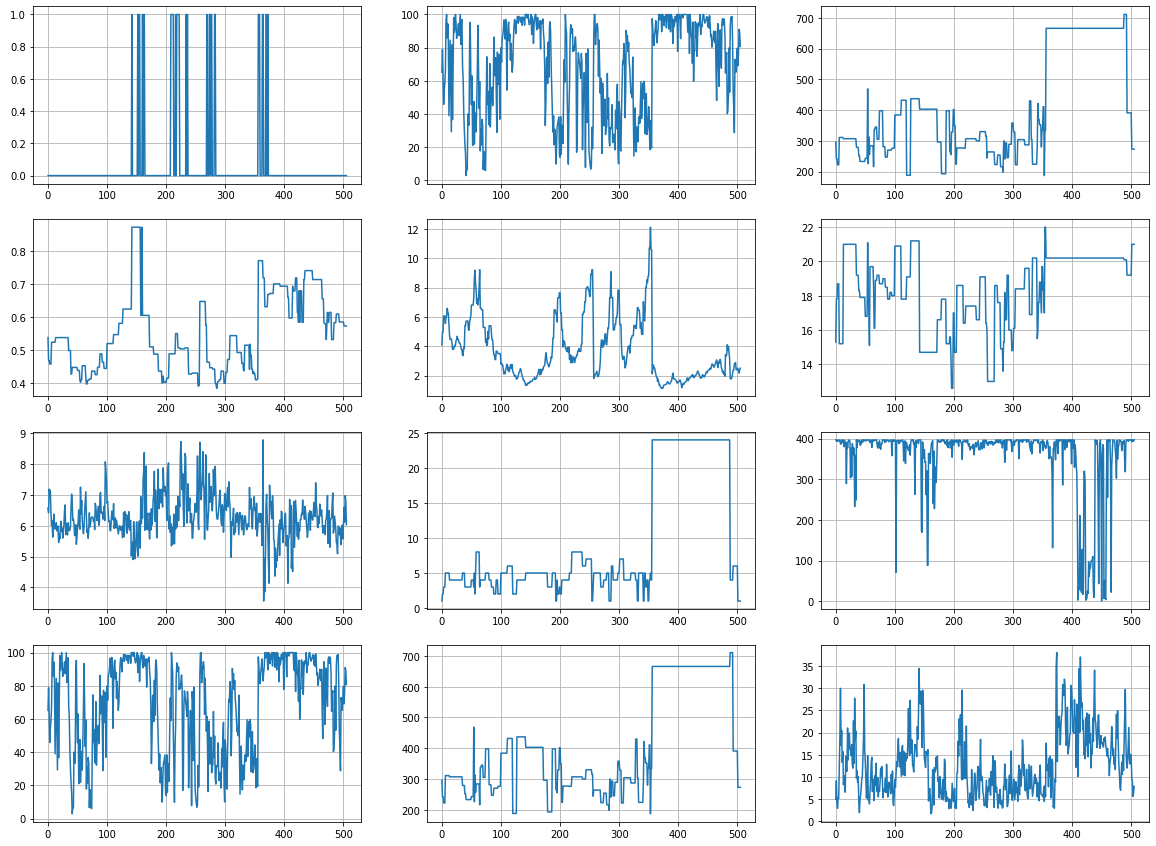

In [45]:
fig, ax = plt.subplots(4, 3, figsize=(20, 15))

for i in range(4):
    for j in range(3):
        ax[i, j].plot(boston.data[:, i + (j + 1) * 3])
        ax[i, j].grid()

In [46]:
boston.data[:5]

array([[  0.0063,  18.    ,   2.31  ,   0.    ,   0.538 ,   6.575 ,
         65.2   ,   4.09  ,   1.    , 296.    ,  15.3   , 396.9   ,
          4.98  ],
       [  0.0273,   0.    ,   7.07  ,   0.    ,   0.469 ,   6.421 ,
         78.9   ,   4.9671,   2.    , 242.    ,  17.8   , 396.9   ,
          9.14  ],
       [  0.0273,   0.    ,   7.07  ,   0.    ,   0.469 ,   7.185 ,
         61.1   ,   4.9671,   2.    , 242.    ,  17.8   , 392.83  ,
          4.03  ],
       [  0.0324,   0.    ,   2.18  ,   0.    ,   0.458 ,   6.998 ,
         45.8   ,   6.0622,   3.    , 222.    ,  18.7   , 394.63  ,
          2.94  ],
       [  0.0691,   0.    ,   2.18  ,   0.    ,   0.458 ,   7.147 ,
         54.2   ,   6.0622,   3.    , 222.    ,  18.7   , 396.9   ,
          5.33  ]])

In [47]:
lr = LinearRegression(normalize=True)  # recommended that you normalize the data yourself

In [48]:
# Split dataset

X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.1)



In [49]:
# Train the model

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [50]:
# Make predictions using the testing set

y_pred = lr.predict(X_test)

In [51]:
lr.coef_

array([ -0.1108,   0.0545,   0.0329,   3.0652, -20.7361,   3.638 ,
         0.0042,  -1.5816,   0.331 ,  -0.0127,  -0.9303,   0.0087,
        -0.5482])

In [52]:
lr.intercept_

39.24269693666744

In [53]:
print("Mean squared error: {:.2f}".format(
        mean_squared_error(y_test, y_pred)))

Mean squared error: 16.46


In [54]:
# Explained variance score: 1 is perfect prediction

print("Variance score: {:.2f}".format(
    r2_score(y_test, y_pred)))

Variance score: 0.71


In [55]:
lr.score(X_test, y_test)

0.7142990972722423

In [56]:
# CV score (10-fold validation)  # cross validation - cool check this out more include genetic learning???

scores = cross_val_score(lr, boston.data, boston.target, cv=10, scoring='r2')

In [57]:
scores

array([ 0.7338,  0.4731, -1.0063,  0.6411,  0.5477,  0.7364,  0.3783,
       -0.1292, -0.7684,  0.4189])

In [58]:
scores.mean(), scores.std()

(0.20252899006056363, 0.5952960169512287)

#### Using Dataframes

In [59]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


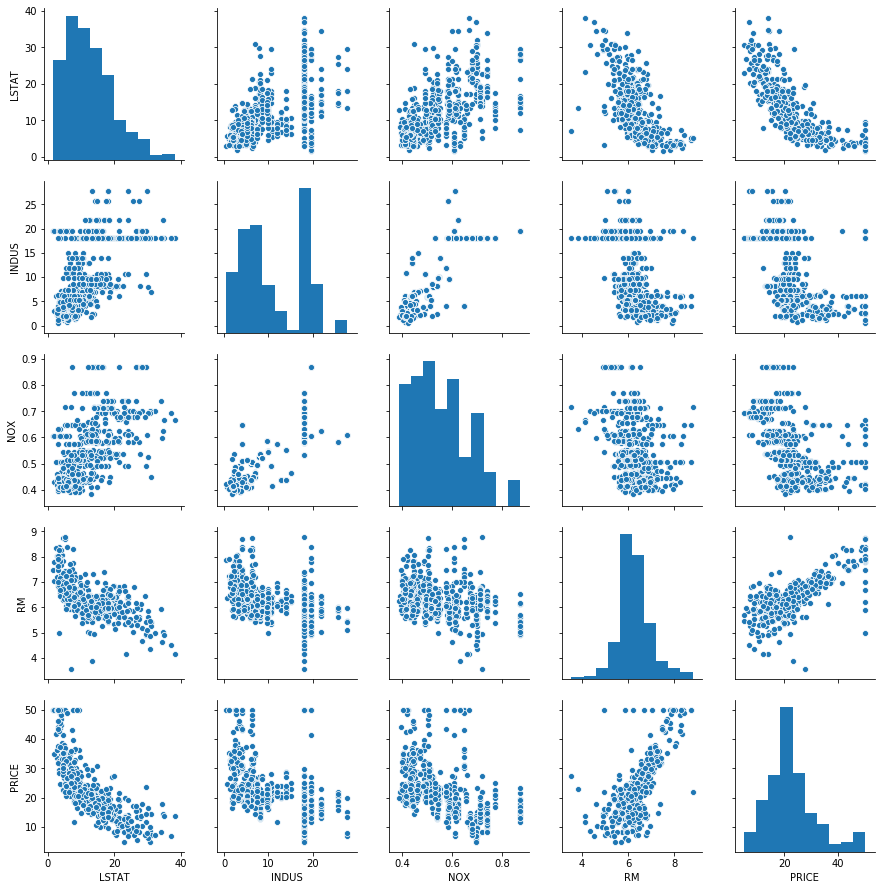

In [60]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'PRICE']

sns.pairplot(boston_df[cols]);

In [61]:
cm = np.corrcoef(boston_df[cols].values.T)
cm

array([[ 1.    ,  0.6038,  0.5909, -0.6138, -0.7377],
       [ 0.6038,  1.    ,  0.7637, -0.3917, -0.4837],
       [ 0.5909,  0.7637,  1.    , -0.3022, -0.4273],
       [-0.6138, -0.3917, -0.3022,  1.    ,  0.6954],
       [-0.7377, -0.4837, -0.4273,  0.6954,  1.    ]])

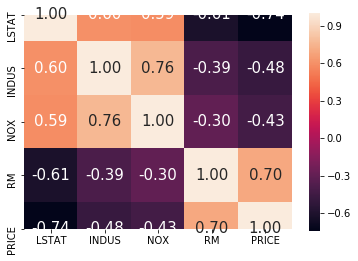

In [62]:
sns.heatmap(cm,cbar=True, annot=True,square=True,
                 fmt='.2f',annot_kws={'size': 15},
                 yticklabels=cols,xticklabels=cols);

In [63]:
X = boston_df.drop('PRICE', axis = 1)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [64]:
lr = LinearRegression(normalize=True);

In [65]:
lr.fit(X, boston_df.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [66]:
lr.coef_

array([ -0.108 ,   0.0464,   0.0206,   2.6867, -17.7666,   3.8099,
         0.0007,  -1.4756,   0.306 ,  -0.0123,  -0.9527,   0.0093,
        -0.5248])

In [67]:
pd.DataFrame({'feature': boston.feature_names, 'estimatedCoeff': lr.coef_})

,feature,estimatedCoeff
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


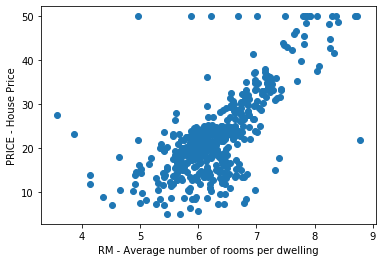

In [68]:
plt.scatter(boston_df.RM, boston_df.PRICE)
plt.xlabel('RM - Average number of rooms per dwelling')
plt.ylabel('PRICE - House Price');

In [69]:
y = boston_df.PRICE

y_pred = lr.predict(X)

In [70]:
print("Mean squared error: {:.2f}".format(
        mean_squared_error(y, y_pred)))

Mean squared error: 21.89


In [71]:
np.mean((y - y_pred)**2)

21.894831181729202

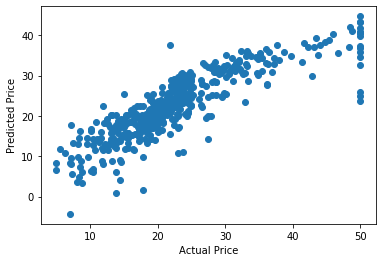

In [72]:
plt.scatter(y, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price');

## Polynomial regression
 - One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. 
 - Linear model for 2-dimensional data: $\hat{y}$(${w,x}$) = $w_{0}$ + $w_{1}$$x_{1}$ + $w_{2}$$x_{2}$
 - To fit a paraboloid to the data instead of a plane, we can combine the features in second-order polynomials: $\hat{y}$(${w,x}$) = $w_{0}$ + $w_{1}$$x_{1}$ + $w_{2}$$x_{2}$ + $w_{3}$$x_{1}$$x_{2}$ + $w_{4}$$x_{1}^2$ + $w_{5}$$x_{2}^2$

In [73]:
from sklearn.preprocessing import PolynomialFeatures

In [74]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [75]:
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

The features of $X$ have been transformed from $[x_{1}, x_{2}]$ to $[1, x_{1}, x_{2}, x_{1}^2, x_{1}x_{2}, x_{2}^2]$, and can now be used within any linear model.



In [76]:
from sklearn.pipeline import Pipeline

In [77]:
# fit to an order-3 polynomial data

model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])

In [78]:
x = np.arange(5)
y = 3 - 2 * x + x ** 2 - x ** 3
print(list(zip(x,y)))

[(0, 3), (1, 1), (2, -5), (3, -21), (4, -53)]


In [79]:
x[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [80]:
model = model.fit(x[:, np.newaxis], y)

In [81]:
model.named_steps['linear'].coef_

array([ 3., -2.,  1., -1.])

## Underfitting vs Overfitting

In [82]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [83]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [84]:
np.random.seed(0)

In [85]:
n_samples = 30
degrees = [1, 4, 15]

In [86]:
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1  # generate y data including some noise

In [87]:
X

array([0.0202, 0.071 , 0.0871, 0.1183, 0.1434, 0.3834, 0.4147, 0.4237,
       0.4376, 0.4615, 0.5218, 0.5289, 0.5449, 0.5488, 0.568 , 0.6028,
       0.6399, 0.6459, 0.7152, 0.7782, 0.7805, 0.7917, 0.7992, 0.8326,
       0.87  , 0.8918, 0.9256, 0.9447, 0.9637, 0.9786])

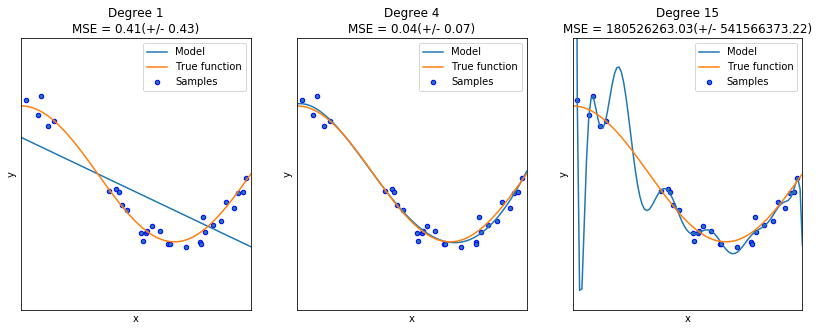

In [88]:
plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    
    X_test = np.linspace(0, 1, 100)
    
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2f}(+/- {:.2f})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

### Modeling Non-linear relationships in Boston Housing dataset

In [89]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [90]:
X = boston_df[['LSTAT']].values
X[:5]

array([[4.98],
       [9.14],
       [4.03],
       [2.94],
       [5.33]])

In [91]:
y = boston_df['PRICE'].values
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [92]:
# create quadratic features

quadratic = PolynomialFeatures(degree=2)

cubic = PolynomialFeatures(degree=3)

X_quad = quadratic.fit_transform(X)

X_cubic = cubic.fit_transform(X)

In [93]:
lr = LinearRegression()

In [94]:
X_fit = np.arange(X.min(), X.max())[:, np.newaxis]
X_fit[:5]

array([[1.73],
       [2.73],
       [3.73],
       [4.73],
       [5.73]])

In [95]:
lr.fit(X, y)

y_lin_fit = lr.predict(X_fit)

linear_r2 = r2_score(y, lr.predict(X))

In [96]:
lr.fit(X_quad, y)

y_quad_fit = lr.predict(quadratic.fit_transform(X_fit))

quadratic_r2 = r2_score(y, lr.predict(X_quad))

In [97]:
lr.fit(X_cubic, y)

y_cubic_fit = lr.predict(cubic.fit_transform(X_fit))

cubic_r2 = r2_score(y, lr.predict(X_cubic))

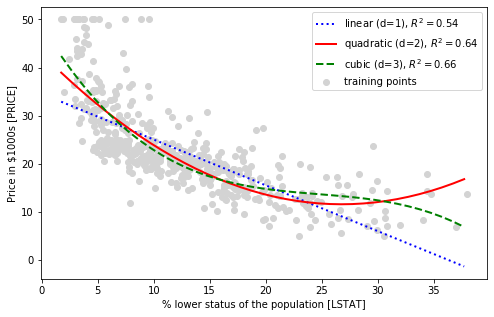

In [98]:
plt.figure(figsize=(8, 5))

plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2={:.2f}$'.format(linear_r2), 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2={:.2f}$'.format(quadratic_r2),
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2={:.2f}$'.format(cubic_r2),
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [PRICE]')
plt.legend(loc='upper right');

### Bike Traffic Example

In [99]:
counts = pd.read_csv('http://people.bu.edu/kalathur/datasets/Fremont_Bridge_Hourly_Bicycle_Counts.csv',
                   index_col='Date', parse_dates=True)
counts.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-01-01 00:00:00,0.0,9.0
2019-01-01 01:00:00,2.0,22.0
2019-01-01 02:00:00,1.0,11.0
2019-01-01 03:00:00,1.0,2.0
2019-01-01 04:00:00,2.0,1.0


In [100]:
counts.tail()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2016-02-29 00:00:00,2.0,2.0
2013-09-13 03:00:00,1.0,1.0
2016-12-07 00:00:00,3.0,3.0
2013-03-29 04:00:00,1.0,1.0
2017-05-24 01:00:00,4.0,4.0


In [101]:
weather = pd.read_csv('http://people.bu.edu/kalathur/datasets/seattle_weather.csv',
                   index_col='DATE', parse_dates=True)
weather.head()

,AWND,PRCP,TMAX,TMIN
DATE,,,,
2012-01-01,10.51,0.00,55,41
2012-01-02,10.07,0.43,51,37
2012-01-03,5.14,0.03,53,45
2012-01-04,10.51,0.80,54,42
2012-01-05,13.65,0.05,48,37


In [102]:
#  compute the total daily bicycle traffic, and put this in its own dataframe

daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns

daily.head()

,Total
Date,
2012-10-03,3521.0
2012-10-04,3475.0
2012-10-05,3148.0
2012-10-06,2006.0
2012-10-07,2142.0


In [103]:
# add binary columns for day of week

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(int)

#daily.head()
daily[0:20]

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,3521.0,0,0,1,0,0,0,0
2012-10-04,3475.0,0,0,0,1,0,0,0
2012-10-05,3148.0,0,0,0,0,1,0,0
2012-10-06,2006.0,0,0,0,0,0,1,0
2012-10-07,2142.0,0,0,0,0,0,0,1
2012-10-08,3537.0,1,0,0,0,0,0,0
2012-10-09,3501.0,0,1,0,0,0,0,0
2012-10-10,3235.0,0,0,1,0,0,0,0
2012-10-11,3047.0,0,0,0,1,0,0,0


In [104]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2020')

holidays

DatetimeIndex(['2012-01-02', '2012-01-16', '2012-02-20', '2012-05-28',
               '2012-07-04', '2012-09-03', '2012-10-08', '2012-11-12',
               '2012-11-22', '2012-12-25', '2013-01-01', '2013-01-21',
               '2013-02-18', '2013-05-27', '2013-07-04', '2013-09-02',
               '2013-10-14', '2013-11-11', '2013-11-28', '2013-12-25',
               '2014-01-01', '2014-01-20', '2014-02-17', '2014-05-26',
               '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11',
               '2014-11-27', '2014-12-25', '2015-01-01', '2015-01-19',
               '2015-02-16', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25',
               '2016-01-01', '2016-01-18', '2016-02-15', '2016-05-30',
               '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11',
               '2016-11-24', '2016-12-26', '2017-01-02', '2017-01-16',
               '2017-02-20', '2017-05-29', '2017-07-04', '2017-09-04',
      

In [105]:
holidays_series = pd.Series(1, index=holidays, name='holiday')

holidays_series[:5]

2012-01-02    1
2012-01-16    1
2012-02-20    1
2012-05-28    1
2012-07-04    1
Name: holiday, dtype: int64

In [106]:
daily = daily.join(holidays_series)
daily.head(10)

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,3521.0,0,0,1,0,0,0,0,NaN
2012-10-04,3475.0,0,0,0,1,0,0,0,NaN
2012-10-05,3148.0,0,0,0,0,1,0,0,NaN
2012-10-06,2006.0,0,0,0,0,0,1,0,NaN
2012-10-07,2142.0,0,0,0,0,0,0,1,NaN
2012-10-08,3537.0,1,0,0,0,0,0,0,1.0
2012-10-09,3501.0,0,1,0,0,0,0,0,NaN
2012-10-10,3235.0,0,0,1,0,0,0,0,NaN
2012-10-11,3047.0,0,0,0,1,0,0,0,NaN


In [107]:
daily['holiday'].fillna(0, inplace=True)
daily.head(10)

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,3521.0,0,0,1,0,0,0,0,0.0
2012-10-04,3475.0,0,0,0,1,0,0,0,0.0
2012-10-05,3148.0,0,0,0,0,1,0,0,0.0
2012-10-06,2006.0,0,0,0,0,0,1,0,0.0
2012-10-07,2142.0,0,0,0,0,0,0,1,0.0
2012-10-08,3537.0,1,0,0,0,0,0,0,1.0
2012-10-09,3501.0,0,1,0,0,0,0,0,0.0
2012-10-10,3235.0,0,0,1,0,0,0,0,0.0
2012-10-11,3047.0,0,0,0,1,0,0,0,0.0


(8, 17)

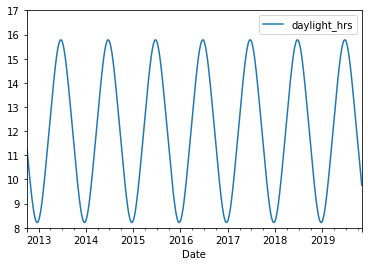

In [108]:
# Hours of daylight

def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

In [109]:
weather['Temp'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

In [110]:
# precip is in 1/10 mm; convert to inches

weather['PRCP'] /= 254
weather['dry_day'] = (weather['PRCP'] == 0).astype(int)

In [111]:
weather['2012-10-03':].head()

,AWND,PRCP,TMAX,TMIN,Temp,dry_day
DATE,,,,,,
2012-10-03,16.33,0.0,66,46,56.0,1
2012-10-04,14.54,0.0,66,47,56.5,1
2012-10-05,12.75,0.0,71,48,59.5,1
2012-10-06,11.41,0.0,75,46,60.5,1
2012-10-07,2.91,0.0,75,46,60.5,1


In [112]:
daily = daily.join(weather[['PRCP', 'Temp', 'dry_day']])
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp,dry_day
Date,,,,,,,,,,,,,
2012-10-03,3521.0,0,0,1,0,0,0,0,0.0,11.277359,0.0,56.0,1.0
2012-10-04,3475.0,0,0,0,1,0,0,0,0.0,11.219142,0.0,56.5,1.0
2012-10-05,3148.0,0,0,0,0,1,0,0,0.0,11.161038,0.0,59.5,1.0
2012-10-06,2006.0,0,0,0,0,0,1,0,0.0,11.103056,0.0,60.5,1.0
2012-10-07,2142.0,0,0,0,0,0,0,1,0.0,11.045208,0.0,60.5,1.0


In [113]:
len(daily)

2585

In [114]:
# Drop any rows with null values

daily.dropna(axis=0, how='any', inplace=True)
len(daily)

2340

In [115]:
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry_day', 'Temp']

X = daily[column_names]
y = daily['Total']


In [116]:
model = LinearRegression(fit_intercept=False)

model.fit(X, y)

daily['predicted'] = model.predict(X)

In [117]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp,dry_day,predicted
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0,0,1,0,0,0,0,0.0,11.277359,0.0,56.0,1.0,3634.126478
2012-10-04,3475.0,0,0,0,1,0,0,0,0.0,11.219142,0.0,56.5,1.0,3508.497435
2012-10-05,3148.0,0,0,0,0,1,0,0,0.0,11.161038,0.0,59.5,1.0,3311.313387
2012-10-06,2006.0,0,0,0,0,0,1,0,0.0,11.103056,0.0,60.5,1.0,1995.417856
2012-10-07,2142.0,0,0,0,0,0,0,1,0.0,11.045208,0.0,60.5,1.0,1909.193736


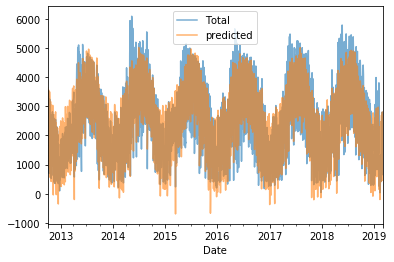

In [118]:
daily[['Total', 'predicted']].plot(alpha=0.6);

In [119]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon               -507.917183
Tue               -387.570857
Wed               -414.522840
Thu               -555.081247
Fri               -872.575854
Sat              -2224.499564
Sun              -2304.618191
holiday          -1218.439564
daylight_hrs       105.543215
PRCP           -182811.684733
dry_day            498.130283
Temp                42.147684
dtype: float64

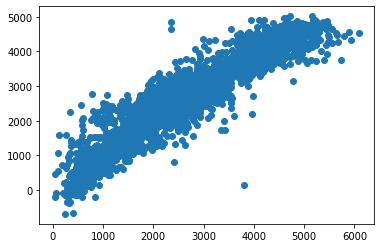

In [120]:
plt.scatter(daily.Total, daily.predicted);